In [1]:
import face_recognition 
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle 
import numpy as np 
import cv2 
from scipy.spatial import distance 

Found 1 number of faces.


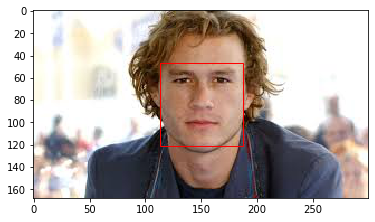

In [2]:
# Loding an image of Heath Ledger for Preview. 
"""

Please do edit the directory of the image according to your system before testing. 
like "img = cv2.imread('Datasets/faceRecognition/known/hl1.jpeg')" to 
"img = cv2.imread('hl1.jpeg')" 

"""
img = cv2.imread('Datasets/faceRecognition/known/hl1.jpeg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Preview of No. of faces found in the image. 
face_positions = face_recognition.face_locations(img)
print('Found {} number of faces.'.format(len(face_positions)))

# Preview of the detected face in the image with rectangular border. 
ax = plt.gca()
for face_pos in face_positions:
    top, right, bottom, left = face_pos
    x, y, w, h = left, top, right, bottom
    # print('A face is located at pixel location top: {}, left: {}, bottom: {}, right: {}'.format(x, y, w, h))
    rect = Rectangle((x, y), w-x, h-y, fill=False, color='red')
    ax.add_patch(rect) 
plt.imshow(img)

In [3]:
# Loding a few Images to be added in the known images list. 
"""

Please do edit the directory of the image according to your system before testing. 
like "img = cv2.imread('Datasets/faceRecognition/known/hl1.jpeg')" to 
"img = cv2.imread('hl1.jpeg')" 

"""
img1 = cv2.imread('Datasets/faceRecognition/known/hl1.jpeg') # Heath Ledger as hl1
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
img2 = cv2.imread('Datasets/faceRecognition/known/jd1.jpeg') # Johnny Depp as jd1
img2 = cv2.cvtColor(img2, cv2.COLOR_BGR2RGB) 
img3 = cv2.imread('Datasets/faceRecognition/known/bp1.jpeg') # Brad Pitt as bp1
img3 = cv2.cvtColor(img3, cv2.COLOR_BGR2RGB) 

# Encoding the loaded Images. 
img1_encoding = face_recognition.face_encodings(img1)[0] 
img2_encoding = face_recognition.face_encodings(img2)[0] 
img3_encoding = face_recognition.face_encodings(img3)[0] 

#Dataset of known faces encodings: 
known_encodings = [
    img1_encoding, 
    img2_encoding, 
    img3_encoding
]

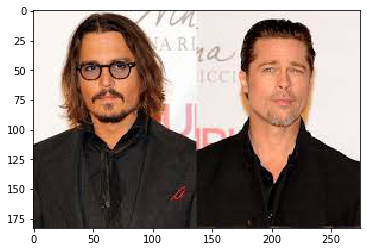

In [4]:
# Loding an unknown image. 
"""

Please do edit the directory of the image according to your system before testing. 
like "img = cv2.imread('Datasets/faceRecognition/known/jdbp.jpeg')" to 
"img = cv2.imread('jdbp.jpeg')" 

"""
uimg1 = cv2.imread('Datasets/faceRecognition/unknown/jdbp.jpeg') # Image of Jhonny Depp with Brad Pitt as jdbp. 
uimg1 = cv2.cvtColor(uimg1, cv2.COLOR_BGR2RGB) 
uimg1_encoding = face_recognition.face_encodings(uimg1) 

plt.imshow(uimg1)

In [5]:
"""Comaparing the Euclidean Dist. of every unknown face in the unknown image with the threshold value to check if any 
of them is in the known images list. """ 

for unknown_face_encodings in uimg1_encoding:
    results = list()
    for known_face_encoding in known_encodings:
        d = distance.euclidean(known_face_encoding, unknown_face_encodings) 
        # print('Euclidean Distance: ', d) 
        results.append(d)
        threshold=0.6
        result = np.array(results) <= threshold 
    
    name = 'Unknown' 
    
    if result[0]: 
        name = 'Heath Ledger' 
    elif result[1]: 
        name = 'Jhonny Depp' 
    elif result[2]: 
        name = 'Brad Pitt' 
    
    print(f"Found {name} in image. ")
    

Found Brad Pitt in image. 
Found Jhonny Depp in image. 
